<h1><center>GMDL, HW2</center></h1>

<h4><center>Pan Eyal, Ilana Pervoi</center></h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from tqdm import tqdm

In [2]:
temps = [1, 1.5, 2]
x_values = {1, -1}

## Computer Excercise 1

In [3]:
def G(row_s, Temp):
    return np.exp((1/Temp) * np.dot(row_s[0:-1], row_s[1:]))

## Computer Excercise 2

In [4]:
def F(row_s, row_t, Temp):
    return np.exp((1/Temp) * np.dot(row_s, row_t))

## Computer Excercise 3

In [5]:
z_temps = [0] * 3
for i in range(3):
    for x_1_1 in x_values:
        for x_1_2 in x_values:
            for x_2_1 in x_values:
                for x_2_2 in x_values:
                    grid = [[x_1_1,x_1_2],
                            [x_2_1,x_2_2]]
                    z_temps[i] += G(grid[0], temps[i])*G(grid[1], temps[i])*F(grid[0],grid[1], temps[i])

In [6]:
def print_z_temps(z_temps):
    for i in range(3):
        print(f"For temperature: {temps[i]}, Z_temp = {z_temps[i]}")

In [7]:
print_z_temps(z_temps)

For temperature: 1, Z_temp = 121.23293134406595
For temperature: 1.5, Z_temp = 40.922799092745386
For temperature: 2, Z_temp = 27.048782764334526


## Computer Excercise 4

In [8]:
z_temps = [0] * 3
for i in range(3):
    for x_1_1 in x_values:
        for x_1_2 in x_values:
            for x_1_3 in x_values:
                for x_2_1 in x_values:
                    for x_2_2 in x_values:
                        for x_2_3 in x_values:
                            for x_3_1 in x_values:
                                for x_3_2 in x_values:
                                    for x_3_3 in x_values:
                                        grid = [[x_1_1,x_1_2,x_1_3],
                                                [x_2_1,x_2_2,x_2_3],
                                                [x_3_1,x_3_2,x_3_3]]
                                        z_temps[i] += G(grid[0], temps[i])*G(grid[1], temps[i])*G(grid[2], temps[i])*F(grid[0],grid[1], temps[i])*F(grid[1],grid[2], temps[i])

In [9]:
print_z_temps(z_temps)

For temperature: 1, Z_temp = 365645.7491357704
For temperature: 1.5, Z_temp = 10565.421983514265
For temperature: 2, Z_temp = 2674.518123060087


## Computer Excercise 5

In [10]:
def y2row(y,width=8):
    """
    y: an integer in (0,...,(2**width)-1)
    """
    if not 0<=y<=(2**width)-1:
        raise ValueError(y)
    my_str=np.binary_repr(y,width=width)
    my_list = list(map(int,my_str))
    my_array = np.asarray(my_list)
    my_array[my_array==0]=-1
    row=my_array
    return row

In [11]:
z_temps = [0] * 3
y_values = {0,1,2,3}
for i in range(3):
    for y_1 in y_values:
        for y_2 in y_values:
            grid = [y2row(y_1, 2),
                    y2row(y_2, 2)]
            z_temps[i] += G(grid[0], temps[i])*G(grid[1], temps[i])*F(grid[0],grid[1], temps[i])

In [12]:
print_z_temps(z_temps)

For temperature: 1, Z_temp = 121.23293134406595
For temperature: 1.5, Z_temp = 40.922799092745386
For temperature: 2, Z_temp = 27.048782764334526


## Computer Excercise 6

In [13]:
z_temps = [0] * 3
y_values = {0,1,2,3,4,5,6,7}
for i in range(3):
    for y_1 in y_values:
        for y_2 in y_values:
            for y_3 in y_values:
                grid = [y2row(y_1, 3),
                        y2row(y_2, 3),
                        y2row(y_3, 3)]
                z_temps[i] += G(grid[0], temps[i])*G(grid[1], temps[i])*G(grid[2], temps[i])*F(grid[0],grid[1], temps[i])*F(grid[1],grid[2], temps[i])

In [14]:
print_z_temps(z_temps)

For temperature: 1, Z_temp = 365645.7491357704
For temperature: 1.5, Z_temp = 10565.421983514265
For temperature: 2, Z_temp = 2674.518123060087


## Computer Excercise 7

In [15]:
def forward_pass(temp, width=8):
    y_values = 2 ** width
    Ts = [np.ones(y_values)]
    for k in (prog_bar := tqdm(range(1, width))):
        prog_bar.set_description(f"(Temp = {temp}) Forward Pass             ")
        Ts.append(np.zeros(y_values))
        for i in range(y_values):
            for j in range(y_values):
                Ts[k][i] += Ts[k-1][j]*G(y2row(j, width), temp)*F(y2row(j, width), y2row(i, width), temp)
    
    # for last Ts[k]: k=width
    z_temp = 0
    for j in range(y_values):
        z_temp += Ts[width-1][j]*G(y2row(j, width), temp)
    
    return Ts, z_temp

In [16]:
def calc_ps(Ts, z_temp, temp, width=8):
    y_values = 2 ** width
    Ps = [0]
    for k in (prog_bar := tqdm(range(1, width))):
        prog_bar.set_description(f"(Temp = {temp}) Calculating Probabilities")
        Ps.append(np.zeros((y_values,y_values)))
        for i in range(y_values):
            for j in range(y_values):
                Ps[k][i][j] = (Ts[k-1][i]*G(y2row(i,width),temp)*F(y2row(i,width),y2row(j,width),temp)) / Ts[k][j]
    
    # for last Ps[k]: k=width
    P_last =  np.zeros(y_values)
    for i in range(y_values):
        P_last[i] = Ts[width-1][i]*G(y2row(i,width),temp) / z_temp
    
    return Ps, P_last

In [17]:
def get_sample(Ps, P_last, width=8):
    y_values = 2 ** width
    take_from = np.asarray(range(y_values))
    sample = np.zeros((width, width))
    last_choice = np.random.choice(take_from, p=P_last)
    sample[width-1] = y2row(last_choice, width)
    
    for row in range(width-2, -1, -1):
        curr_choice = np.random.choice(take_from, p=Ps[row+1][:,last_choice])
        sample[row] = y2row(curr_choice, width)
        last_choice = curr_choice
    
    return sample

In [18]:
def sampler(temp, width=8):
    Ts, z_temp = forward_pass(temp)
    Ps, P_last = calc_ps(Ts, z_temp, temp)
    return lambda : get_sample(Ps, P_last, width)

In [19]:
sampler1=sampler(1)
sampler2=sampler(1.5)
sampler3=sampler(2)

(Temp = 2) Calculating Probabilities: 100%|██████████████████████████████████████████████| 7/7 [00:19<00:00,  2.84s/it]


In [20]:
def run_sampler(sampler, n):
    samples = []
    for i in (prog_bar := tqdm(range(n))):
        prog_bar.set_description(f"Getting {n} samples")
        samples.append(sampler())

    return samples

In [21]:
S = []
S.append(run_sampler(sampler1, 10))
S.append(run_sampler(sampler2, 10))
S.append(run_sampler(sampler3, 10))

Getting 10 samples: 100%|█████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 666.64it/s]


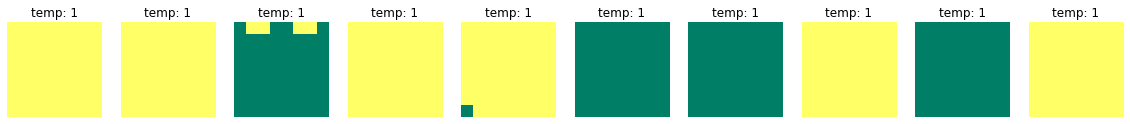

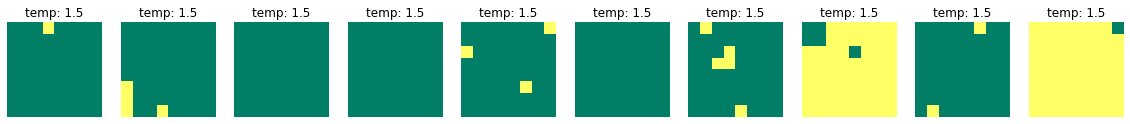

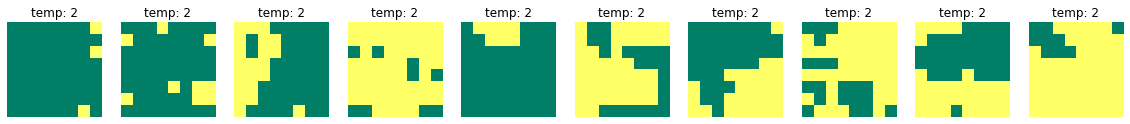

In [22]:
for i in range(len(S)):
    fig, axs = plt.subplots(1, 10, figsize=(20,20))
    for j in range(len(S[i])):
        axs[j].imshow(S[i][j], interpolation="None", cmap='summer', vmin=-1, vmax=+1)
        axs[j].axis("off")
        axs[j].set_title(f"temp: {temps[i]}")

## Problem 1
We would like to calculate the following calculation of the probability:

\begin{align}
p(x)=\frac{1}{Z_{Temp}}exp(\frac{1}{Temp}\sum_{s∼t}x_sx_t)
=\frac{1}{Z_{Temp}}exp(\frac{1}{2}\sum_{s∼t}x_sx_t)
\end{align}

<ins>For these two code commands:</ins><br>
python2 -c "print [1/Temp for Temp in [1,1.5,2]]" <br>
python3 -c "print ([1/Temp for Temp in [1,1.5,2]])" <br>


<ins>The output is:</ins><br>
[1, 0.6666666666666666, 0]<br>
[1.0, 0.6666666666666666, 0.5]<br>


Meaning, calculating int division in python2 remains an int, but python3 computes it in float.<br>
Therefore, in python2, the frustrated student encountered truncation when dividing $\frac{1}{2}$.

Hence:
\begin{align}
p(x)=\frac{1}{Z_{Temp}}exp(0)=\frac{1}{Z_{Temp}}
\end{align}

With:
\begin{align}
Z_{Temp}=\sum_x{exp(\frac{1}{Temp}\sum_{s∼t}x_sx_t)}=\sum_x{exp(0)}=\sum_x{1}=size(x)
\end{align}

And now:
\begin{align}
p(x)=\frac{1}{size(x)}
\end{align}

which means, the student sampled from the uniform distribution over binary images, and gained completely random samples (with no structure whatsoever).

## Computer Excercise 8

In [23]:
temps = [1, 1.5, 2]

E = []

samples_size = 10000

all_samples = []
all_samples.append(run_sampler(sampler1, samples_size))
all_samples.append(run_sampler(sampler2, samples_size))
all_samples.append(run_sampler(sampler3, samples_size))

for i in range(3):
    E_1_2 = 0
    E_1_8 = 0
    for sample in (prog_bar := tqdm(all_samples[i])):
        prog_bar.set_description(f"Calculating Expectations, batch {i}")
        E_1_2 += sample[0,0]*sample[1,1]
        E_1_8 += sample[0,0]*sample[7,7]
    E_1_2 /= samples_size
    E_1_8 /= samples_size
    
    E.append([E_1_2, E_1_8])

Calculating Expectations, batch 2: 100%|███████████████████████████████████████| 10000/10000 [00:08<00:00, 1176.89it/s]


In [24]:
def table(E):
    columns = ["$$\qquad\hat{E}_{Temp}(X_{(1,1)}X_{(2,2)})$$", "$$\qquad\hat{E}_{Temp}(X_{(1,1)}X_{(8,8)})$$"]
    df=pd.DataFrame(E, index=temps, columns=columns)
    df.index.name='temperature'
    return df

In [25]:
table(E)

,"$$\qquad\hat{E}_{Temp}(X_{(1,1)}X_{(2,2)})$$","$$\qquad\hat{E}_{Temp}(X_{(1,1)}X_{(8,8)})$$"
temperature,,
1.0,0.9518,0.9026
1.5,0.7702,0.5608
2.0,0.4976,0.1238


## Problem 2

We can understand from $\hat{E}_{Temp}(X_{(1,1)}X_{(2,2)})$ and $\hat{E}_{Temp}(X_{(1,1)}X_{(8,8)})$ for each of the temperatures values the following:
 - In the case of a lower temperature (=1), the probabilities to obtain two near pixels with the same value and even two far pixels with the same value is likely high.
 - As we raise the temperature (=1.5), we notice that the overall probabilities to obtain two same value pixels (with the same distance as in the lower temperature) decreases.<br>But still, closer pixels have better chance to get the same value than distant pixels.
 - with high temperature (=2) we get that even for two close pixels (with distance 2) the probability of gaining the same value is almost independent of each other (probability = 0.5).<br>For two distant pixels, their probability of getting different values is very high (probability = 1 - 0.1 = 0.9).
 
This behaviour results from the Ising's model property that tends to bind close pixels together with the same value (as it tries to shorten the length of the boundaries separating the values).

## Computer Excercise 9

### Independent Samples

In [26]:
def get_gibbs_sample(temp, sweeps, method=1, width=8, verbose=0):
    # initiate the Gibbs sampler at a random configuration
    sample = np.random.randint(low=0,high=2,size=(width+2,width+2))*2-1
    # pad boundries with 0-s
    sample[0,:] = 0
    sample[:,0] = 0
    sample[width+1, :] = 0
    sample[:, width+1] = 0
    
    prog_bar = range(sweeps)
    
    if verbose:
        prog_bar = tqdm(range(sweeps))
        prog_bar.set_description(f"Getting sample with {sweeps} sweeps")
    
    if method == 2:
        E_1_2 = 0
        E_1_8 = 0
    
    for iteration in prog_bar:
        for i in range(1, width+1):
            for j in range(1, width+1):
                neighbore_sum =  (sample[i-1,j]+sample[i+1,j]+sample[i,j-1]+sample[i,j+1])
                p_x = [(np.exp((1/temp) * neighbore_sum)), (np.exp((-1/temp) * neighbore_sum))]
                p_x = p_x/(p_x[0] + p_x[1]) # normalize the prob to sum to 1
                sample[i,j] = np.random.choice([1,-1], p=p_x)
                
                if iteration >= 99 and method == 2:
                    E_1_2 = ((((iteration - 99) * E_1_2) + sample[1,1]*sample[2,2])/(iteration-98))
                    E_1_8 = ((((iteration - 99) * E_1_8) + sample[1,1]*sample[8,8])/(iteration-98))
    
    if method == 2:
        return [E_1_2, E_1_8]
    
    return sample[1:width+1, 1:width+1]

In [27]:
def independent_samples(temp, n=10000):
    E_1_2 = 0
    E_1_8 = 0

    for i in (prog_bar := tqdm(range(n))):
        prog_bar.set_description(f"Getting {n} samples")
        sample = get_gibbs_sample(temp, 25)
        E_1_2 += sample[0,0]*sample[1,1]
        E_1_8 += sample[0,0]*sample[7,7]

    E_1_2 /= n
    E_1_8 /= n
    
    return [E_1_2, E_1_8]

In [28]:
temps = [1, 1.5, 2]
E = []
for temp in temps:
    E.append(independent_samples(temp))

Getting 10000 samples: 100%|█████████████████████████████████████████████████████| 10000/10000 [13:25<00:00, 12.42it/s]


In [29]:
table(E)

,"$$\qquad\hat{E}_{Temp}(X_{(1,1)}X_{(2,2)})$$","$$\qquad\hat{E}_{Temp}(X_{(1,1)}X_{(8,8)})$$"
temperature,,
1.0,0.9346,0.5528
1.5,0.7540,0.3576
2.0,0.4950,0.1012


In [30]:
def Ergodicity(temp, width=8):
    return (get_gibbs_sample(temp, 25000, method=2, verbose=1))

In [31]:
temps = [1, 1.5, 2]

E = []
for temp in temps:
    E.append(Ergodicity(temp))

Getting sample with 25000 sweeps: 100%|█████████████████████████████████████████| 25000/25000 [01:24<00:00, 294.73it/s]


In [32]:
table(E)

,"$$\qquad\hat{E}_{Temp}(X_{(1,1)}X_{(2,2)})$$","$$\qquad\hat{E}_{Temp}(X_{(1,1)}X_{(8,8)})$$"
temperature,,
1.0,0.960890,0.913566
1.5,0.807486,0.623898
2.0,0.531088,0.095179


## Problem 3

We can see that for two near pixles such as $X_{(1,1)}X_{(2,2)}$, the expectations of the corresponding temperatures in both methods is similar to the exact sampling expectation (and eachother). We speculate that this is because 25 and also obvious 25000 sweeps are enough to achieve good convergence to the true expectations for two near pixels.<br>

However, for two far pixles such as $X_{(1,1)}X_{(8,8)}$, the second method is similar to the  true expectations, as it does 25000 sweeps that ables to converge on 8X8 lattice (only 64 pixels) to the true expectation (according to the law of large numbers).
But in the first method, for temperatures 1 and 1.5, 25 sweeps are not enough to reach convergence.
For temperature 2, the true expectation is closer to 0, meaning the probability for the two pixles to be different from each other is tend to $\frac{1}{2}$. Therefore, the number of sweeps would not effect that much as the expectation of the initial random configuration from the i.i.d fair coin destribution, is already $\frac{1}{2}$.


## Computer Excercise 10

In [33]:
def get_posterior_gibbs_sample(temp, y, sigma, sweeps, width=100):
    # initiate the Gibbs sampler at a random configuration
    sample = np.random.randint(low=0,high=2,size=(width+2,width+2))*2-1
    # pad boundries with 0-s
    sample[0,:] = 0
    sample[:,0] = 0
    sample[width+1, :] = 0
    sample[:, width+1] = 0
        
    for iteration in (prog_bar := tqdm(range(sweeps))):
        prog_bar.set_description(f"Getting posterior sample with {sweeps} sweeps")
        for i in range(1, width+1):
            for j in range(1, width+1):
                neighbore_sum =  (sample[i-1,j]+sample[i+1,j]+sample[i,j-1]+sample[i,j+1])
                p_xy = [(np.exp(((1/temp) * neighbore_sum)-((1/(2*(sigma**2)))*(y[i-1,j-1]-1)**2))), \
                       (np.exp(-(1/temp) * neighbore_sum-(1/(2*(sigma**2)))*(y[i-1,j-1]+1)**2))]
                p_xy = p_xy/(p_xy[0] + p_xy[1]) # normalize the prob to sum to 1
                sample[i,j] = np.random.choice([1,-1], p=p_xy)
        
    return sample[1:width+1, 1:width+1]

In [34]:
def ICM(temp, y, sigma, sweeps, width=100):
    # initiate the Gibbs sampler at a random configuration
    sample = np.random.randint(low=0,high=2,size=(width+2,width+2))*2-1
    # pad boundries with 0-s
    sample[0,:] = 0
    sample[:,0] = 0
    sample[width+1, :] = 0
    sample[:, width+1] = 0
    
    for iteration in (prog_bar := tqdm(range(sweeps))):
        prog_bar.set_description(f"Getting ICM sample with {sweeps} sweeps")
        for i in range(1, width+1):
            for j in range(1, width+1):
                neighbore_sum =  (sample[i-1,j]+sample[i+1,j]+sample[i,j-1]+sample[i,j+1])
                p_xy = [(np.exp((1/temp) * neighbore_sum-(1/(2*(sigma**2)))*(y[i-1,j-1]-1)**2)), \
                       (np.exp(-(1/temp) * neighbore_sum-(1/(2*(sigma**2)))*(y[i-1,j-1]+1)**2))]
                
                sample[i,j] = -1*(np.argmax(p_xy)*2-1)
        
    return sample[1:width+1, 1:width+1]

In [35]:
def MLE(y):
    return np.sign(y)

In [36]:
Xs = []
Ys = []
postiriors = []
ICMs = []
MLEs= []

for temp in temps:
    sigma = 2
    sweeps = 50
    
    x = get_gibbs_sample(temp, sweeps, width=100, verbose=1)
    Xs.append(x)
    
    eta = 2*np.random.standard_normal(size=(100,100))
    y = x + eta
    Ys.append(y)
    
    postiriors.append(get_posterior_gibbs_sample(temp, y, sigma, sweeps))
    ICMs.append(ICM(temp, y, sigma, sweeps))
    MLEs.append(MLE(y))

Getting ICM sample with 50 sweeps: 100%|███████████████████████████████████████████████| 50/50 [00:12<00:00,  4.11it/s]


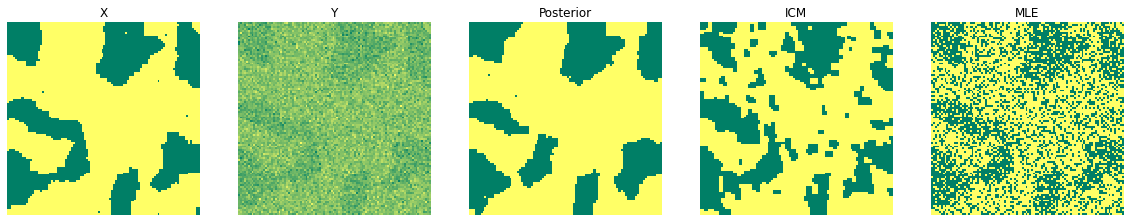

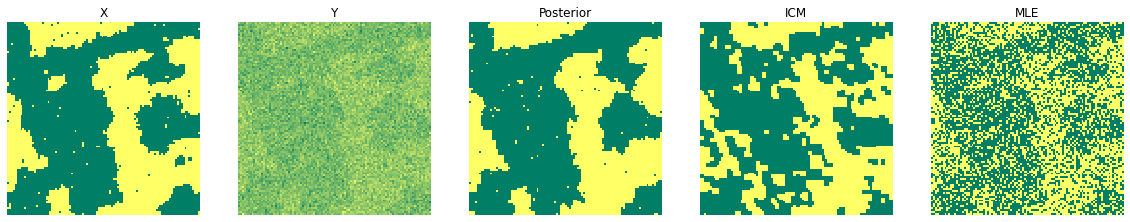

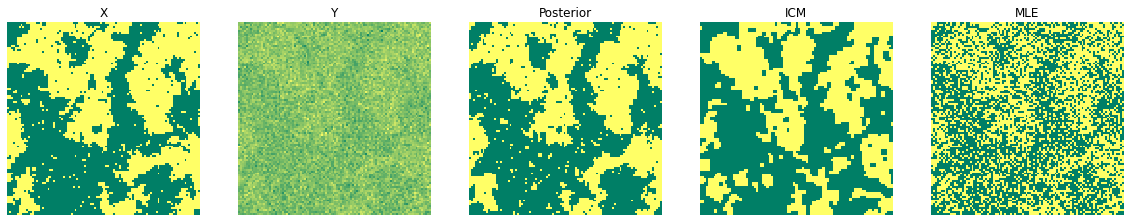

In [37]:
for i in range(3):
    fig, axs = plt.subplots(1, 5, figsize=(20,20))
    axs[0].imshow(Xs[i], interpolation="None", cmap='summer', vmin=-1, vmax=+1)
    axs[0].axis("off")
    axs[0].set_title("X")
    
    axs[1].imshow(Ys[i], interpolation="None", cmap='summer')
    axs[1].axis("off")
    axs[1].set_title("Y")
    
    axs[2].imshow(postiriors[i], interpolation="None", cmap='summer', vmin=-1, vmax=+1)
    axs[2].axis("off")
    axs[2].set_title("Posterior")
    
    axs[3].imshow(ICMs[i], interpolation="None", cmap='summer', vmin=-1, vmax=+1)
    axs[3].axis("off")
    axs[3].set_title("ICM")
    
    axs[4].imshow(MLEs[i], interpolation="None", cmap='summer', vmin=-1, vmax=+1)
    axs[4].axis("off")
    axs[4].set_title("MLE")